<a href="https://colab.research.google.com/github/solankinitin1210/hotel-booking-analysis/blob/main/Capstone_Project_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Problem Statment**

<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

<b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

<b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### Steps performed in this EDA *Projests*

Handling this dataset with the fundamental steps to unvail the factors :

* Imports Libraries, Dataset and Other modules
* Analysing Data : Reading & Inspection of Data.
    *   Data Structure (Head , Tail or Body)
    *   Data information (basic schema)
    *   Arithmatic measurement (data discriptions)
* Data Preparation & Processing
    *   Identifying Different Variable
    *   Sortlisting Dependent Variables 
    *   Handling Null Values
    *   Adding, combining &renaming of Column if required.
* Analysis & Visualization
    *   Identifying relation of dependent variables with Problemset.
    *   Visualization using differen plots in relation with question.
* Conclusion : Answer to the Questions


# **2. Import required libraries and get data for analysis**

In [37]:
# Import Iibraries
import pandas as pd  
import numpy as np
from datetime import date
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#Mount drive and get Data
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Almabetter/Hotel Bookings.csv'
df=pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Review the data and analyse all columns**

In [39]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [41]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **4. Data Preparation & Processing**

## Type Of Varaiables
### The dataset have **<font color='green'>32 variables (Continuous and Categorical)</font>**
Observation:

All the data type are in required format only, and no need to convert or change the datatype,Some Visible Null Values in certain column.

Total Rows = 119390, Column = 32

## Sortlisting of Dependent Variables
Well after brainstorming we conclude the following set

##**Categorical**  (20 Nos) :

<font color='red'>[ hotel, is_canceled, arrival_date_year, arrival_date_month, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, reserved_room_type, assinged_room_type, deposit_type, agent, company, customer_type, required_car_parking_spaces, total_of_special_requests, reservation_status ]</font>

Out of this 20 variable we found 10 variable which are dependent with the problem set and expecting high or medium relevence to th problem.

* hotel, 
* arrival_date_month, 
* children, 
* babies, 
* country, 
* market_segment, 
* distribution_channel, 
* is_repeated_guest,
* company,
* customer_type

## **Continuous** (12 Nos) 

<font color='red'>[lead_time, arrival_date_week_number, arrival_date_day_of_month, staysinweekend_nights, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list, sdr, reservation_status_date ]</font>

Out of 12 Nos of Continuous variable we sortlisted to 6 variable which are dependent with the problem set and expecting high or medium relevence to th problem.

* lead_time,  
* arrival_date_day_of_month, 
* stays_in_weekend_nights, 
* stays_in_week_nights, 
* adults,  
* adr, 

## **Handling Null Values**

In [42]:
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
Missingdata = pd.concat([Total,Percentage], axis=1, keys=['Total', 'Percentage'])
Missingdata.head(10)

,Total,Percentage
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


variable Company has 94.3% of missing data and agent has 13.69%,

we will Simply drop the high missing value column, thing is Company is in dependent Variable list but with 94% missing data variable has no use.

for Country the is 488 rows with null values comparing 488 to total numbers 0.5% so we will remove those rows only, alsochildren has four missing values we will fill with mean values, rest all are fine.

In [43]:
df = df.drop(['company','agent'], axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

We have now 30 column with zero null values.

we will check other possiblilities here one of the threat that sum of all customer i.e Adult + children + babies should be greater than zero. lets see

total 170 rows are there having sum of adults, children and babies is zero will remove these rows

In [44]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

#lets confirm
df[(df.adults+df.babies+df.children)==0].shape

(0, 30)

## **Process and add required columns**

We need to add Date of arrival by joining the mothn,year and date colun and after that we'll get month-year colunm which is require to do month wise booking analysis

In [45]:
#Add a month Number column
month = {'January':1,'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

df['month_no']=0
for index,row in df.iterrows():
  df.loc[index,'month_no']=month[row['arrival_date_month']]

In [46]:
#Add Arival Date Column
df['dateInt']=df['arrival_date_year'].astype(str) + df['month_no'].astype(str).str.zfill(2)+ df['arrival_date_day_of_month'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')

In [47]:
#Add Month-year Column
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')


We need the total nunmber of guest by adding all the three columns adult,children and babies, this column is require for guestwise booking analysis

In [48]:
df['total_guest']=(df['adults']+df['children']+df['babies']).astype(int)

# **5. Hotel type wise Booking Analysis by**

lets start with our 1st variables Hotel

In [49]:
hotel_type_wise_analysis=df.groupby('hotel')['meal'].count().reset_index()

<function matplotlib.pyplot.show>

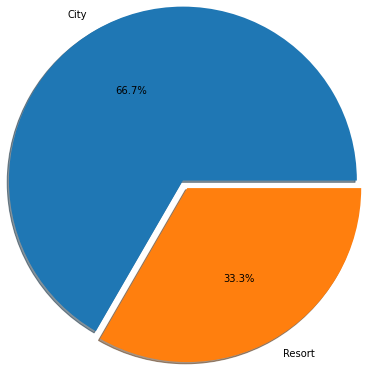

In [50]:
H_type = df['hotel'].value_counts().tolist()
plt.pie(H_type,explode=(0,0.1,),labels=("City","Resort"),radius=2,shadow=True,autopct='%1.1f%%')
plt.show

**So 66.4% bookings are in City hotel and 33.6% which is half in Resort type.**


Initial intution is may be resort is comparatively expensive or location may effect the chosing priority.

But this is just initial guess will see if this backed by data or not, guess is completly based on assumption that citi hotel as name suggest is utility kind of hotel available near around city only,On the otherhand resort hotel can be romotely available and may have higher price compsaritevely.


if I go with assumption of my own i can even think of some variable that can effect the booking phenomenon of different hotels resort hotel can be seasonal can have very high booking demand in certain months or occation and other hand citi hotel may have even bookings.
Lets explore further. 

In [51]:
#Now lets do year wise analysis and for that Get the table which display hotel type wise data for each year
hotel_year_wise_analysis=df.groupby(['arrival_date_year','hotel'])['meal'].count().unstack()
hotel_year_wise_analysis

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13639,8191
2016,38058,18299
2017,27446,13095


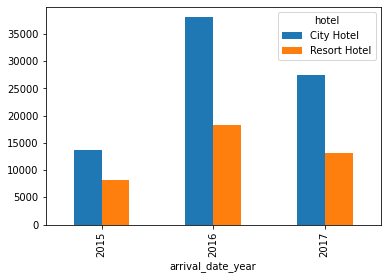

In [52]:
#Plot the analysis
hotel_year_wise_analysis.plot.bar()


# **6. Market segment wise Booking analysis**

This Column have 7 type of market sagment, In this analysis we will try to find if there is any relationship between market sagment and no of booking

In [53]:
##Get the table which display market segment wise data and that way we'll find out which from market sagment received highest booking
market_sagment_analysis=df.groupby('market_segment')['hotel'].count().reset_index().sort_values(by='hotel',ascending=False)
market_sagment_analysis['percentage']=(market_sagment_analysis['hotel']/market_sagment_analysis['hotel'].sum())*100
market_sagment_analysis.rename(columns={'hotel':'No. of booking'},inplace=True)
market_sagment_analysis

,market_segment,No. of booking,percentage
6,Online TA,56333,47.447106
5,Offline TA/TO,24125,20.319554
4,Groups,19786,16.664982
3,Direct,12424,10.464254
2,Corporate,5099,4.294690
1,Complementary,726,0.611482
0,Aviation,235,0.197931


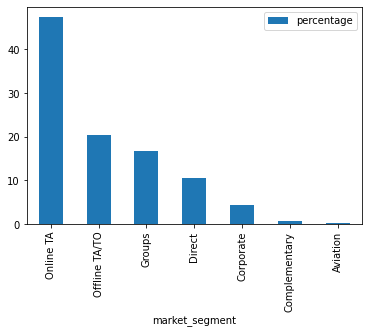

In [54]:
#Plot the analysis
market_sagment_analysis.plot.bar(x='market_segment',y='percentage')

**So 67.5% bookings are Done by Online/offline Tours and traveles agents**

From Above chart we analyze that almost 50% bookings are done through online travels agents, this shows that proper prefer the to book instead of offline online
Online channels sagment are governing the booking over offline channels




# **7.Distribution channel wise booking analysis**

In [55]:
##Get the table which display distribution channel wise data and that way we'll find out which from market sagment received highest booking
Distribution_chanel_analysis=df.groupby('distribution_channel')['hotel'].count().reset_index().sort_values(by='hotel',ascending=False)
Distribution_chanel_analysis['percentage']=(Distribution_chanel_analysis['hotel']/(Distribution_chanel_analysis['hotel'].sum()))*100
Distribution_chanel_analysis.rename(columns={'hotel':'No. of booking'},inplace=True)    # Rename the column's name
Distribution_chanel_analysis

,distribution_channel,No. of booking,percentage
3,TA/TO,97612,82.214810
1,Direct,14450,12.170676
0,Corporate,6472,5.451115
2,GDS,193,0.162556
4,Undefined,1,0.000842


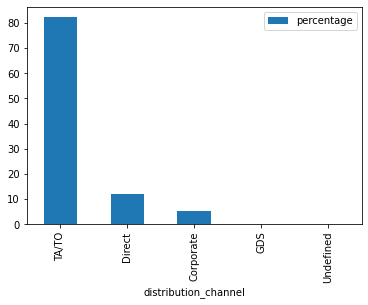

In [56]:
#Plot the analysis
Distribution_chanel_analysis.plot.bar(x='distribution_channel',y='percentage')

**Conclusion :**

here We have noticed that 81% booking done by tours/travel agents, so people prefer to book through third party instead of direct booking and reason could be service and better price (This is just prediction)

# **8.Month wise booking analysis**

Month of booking is very important in hotel booking, We'll get a mothwise booking table, plot it and find which moth is busiest month for hotel booking 

In [57]:
##Get the table which display month wise data and that way we'll find which month was the busiest month
month_wise=df.groupby(['month_year','hotel'])['meal'].count().unstack() 
month_wise

hotel,City Hotel,Resort Hotel
month_year,,
2015-07,1396,1365
2015-08,2470,1397
2015-09,3524,1555
2015-10,3368,1545
2015-11,1232,1085
2015-12,1649,1244
2016-01,1364,851
2016-02,2365,1486
2016-03,3041,1742


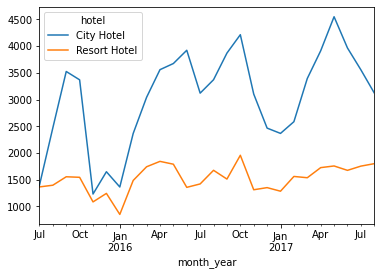

In [58]:
# Plot the above table and see what we get
month_wise.plot()

**Conclusion:**

From the chart we can see that no of booking start increasing from the beginning of month march and in month of April booking has reached at its peak level same curve occur for month of October.
This behaviour of booking is same for both the hotel category.

So we can conclude here that April, may, September, October are busiest moth for booking


# **9.Country wise booking analysis**

In [59]:
##Get the table which display contry wise data and that way we'll find which country's guest made highest booking
country_wise=df.groupby('country')['hotel'].count().reset_index().sort_values(by='hotel',ascending=False)
country_wise['percentage']=(country_wise['hotel']/country_wise['hotel'].sum())*100
country_wise.rename(columns={'hotel':'No. of booking'},inplace=True) # Rename columns
country_wise.head(10)  # Get top 10 countries


,country,No. of booking,percentage
135,PRT,48479,40.831986
59,GBR,12120,10.208207
56,FRA,10401,8.760360
51,ESP,8560,7.209757
43,DEU,7285,6.135874
81,ITA,3761,3.167745
76,IRL,3374,2.841790
15,BEL,2342,1.972576
25,BRA,2222,1.871505
123,NLD,2103,1.771276


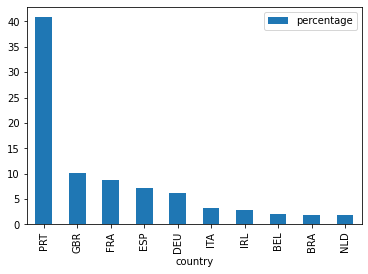

In [60]:
country_wise.head(10).plot.bar(x='country',y='percentage')

In [61]:
d=country_wise[['country','percentage']].head(10)
d
#sns.countplot(data=d,x='country')

,country,percentage
135,PRT,40.831986
59,GBR,10.208207
56,FRA,8.760360
51,ESP,7.209757
43,DEU,6.135874
81,ITA,3.167745
76,IRL,2.841790
15,BEL,1.972576
25,BRA,1.871505
123,NLD,1.771276


**Conclusion:**

From the chart we can see that 40 percent bookings are done by guest from country Portugal(PRT), rest 30 bookings done by UK, Germany, France and Spain

So conclusion is more than 70 percentage of booking govern by mainly 5 countries as mentioned above


# **10.Guestwise Booking Analysis**

**From** this analysis we'll try to find what type of guest (single,couple,group) have made the more booking

In [62]:
# Accomodation type wise Analysis
guest_wise=df.groupby('total_guest')['hotel'].count().reset_index().sort_values(by='hotel',ascending=False)
guest_wise['percentage']=guest_wise['hotel']/guest_wise['hotel'].sum()*100
guest_wise.rename(columns={'hotel':'No. of booking'},inplace=True) # Rename columns
guest_wise

,total_guest,No. of booking,percentage
1,2,81880,68.964356
0,1,22289,18.773162
2,3,10479,8.826056
3,4,3926,3.306718
4,5,137,0.115390
9,26,5,0.004211
6,10,2,0.001685
7,12,2,0.001685
8,20,2,0.001685
10,27,2,0.001685


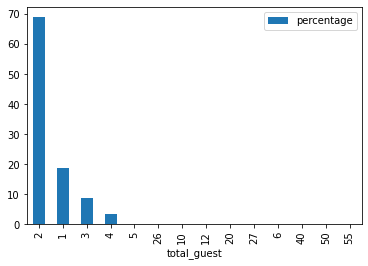

In [63]:
guest_wise.plot.bar(x='total_guest',y='percentage')

In [64]:
# Let Analyse on based on type of customer 
customer_type_analysis = df.groupby(['customer_type','hotel'])['meal'].count().unstack()
customer_type_analysis

hotel,City Hotel,Resort Hotel
customer_type,,
Contract,2296,1776
Group,290,278
Transient,59258,29788
Transient-Party,17299,7743


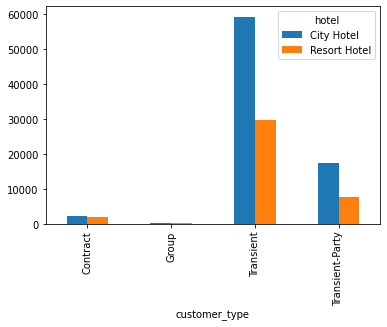

In [65]:
customer_type_analysis.plot.bar()

**Conlusion**

Most bookings (50%)bookings are done through online travels agents and for the distribution channel 80% of bookings we 


# **11.Cancellation Analysis**

In [69]:
# Let's analyse the cancellation of booking for given dataset
Cancellation_analysis=df.groupby('hotel')['is_canceled'].sum().reset_index()
Cancellation_analysis.rename(columns={'is_canceled':'No. of cancellation'},inplace=True)
Cancellation_analysis

,hotel,No. of cancellation
0,City Hotel,33061
1,Resort Hotel,11077


In [70]:
# Get the table from our first analysis to get join with Cancellation_analysis table
hotel_type_wise_analysis

,hotel,meal
0,City Hotel,79143
1,Resort Hotel,39585


In [76]:
# Let's join the table and get our final table
Cancellation=pd.merge(Cancellation_analysis, hotel_type_wise_analysis, on='hotel', how='inner')
Cancellation['percentage']=(y['No. of cancellation']/y['meal'])*100 # here we used meal column just for count purpose
Cancellation.rename(columns={'meal': 'Total no. of bookings'}, inplace=True)
Cancellation

,hotel,No. of cancellation,Total no. of bookings,percentage
0,City Hotel,33061,79143,41.773751
1,Resort Hotel,11077,39585,27.982822


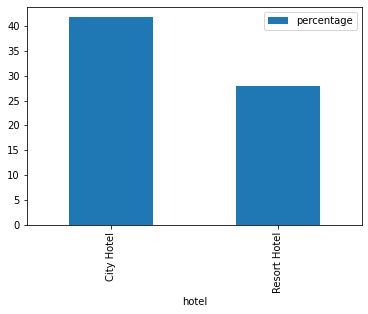

In [77]:
Cancellation.plot.bar(x='hotel',y='percentage')

**Conclusion**

City hotels 41% bookings were cancelled after the booking where in case of resort hotel this percentage is 27%


# **12.Finale Conclusion**

- More than 66% of the people prefer to book the City hotel and only 33% people go with Resort hotels
- Most bookings were made from July to August and September to October. And the least bookings were made at the beginning end of the year.
- Portugal, the UK, France, Spain, and Germany are the top countries from which most guests come, more than 80% come from these 5 countries.
- Most bookings (50%)bookings are done through online travels agents and for distribution channel 80% of bookings we 
- Couple (No. of 2 guests) is the most popular accommodation type, 68% bookings were made by couples, also in terms of customer type Transient type customer has made most no. of bookings 
- City hotels 41% bookings were cancelled after the booking where in case of resort hotel this percentage is 27%

